# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,DataSet,Partition,Algorithm,lambda,Beta,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,MAP,Precision,Recall,F1
0,crossfold,5,PersMean,NaN,NaN,Y,0.538,0.542,188,188,188,1.0,0.750835,0.979998,10.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,crossfold,1,ItemItem,NaN,NaN,Y,3.109,5.624,189,189,189,1.0,0.728257,0.920368,10.0,0.004439,0.004439,0.003175,0.031746,0.005772
2,crossfold,1,Popular,NaN,NaN,Y,0.113,0.411,0,0,0,NaN,NaN,NaN,10.0,0.044457,0.044457,0.011111,0.111111,0.020202
3,crossfold,5,SLIM-Norm,2.0,1.0,Y,63.233,1.702,188,188,188,1.0,0.781273,1.019472,10.0,0.005319,0.005319,0.000532,0.005319,0.000967
4,crossfold,5,SLIM-Norm,2.0,3.0,Y,63.280,1.737,188,188,188,1.0,0.779897,1.018354,10.0,0.005319,0.005319,0.000532,0.005319,0.000967


In [26]:
results

,DataSet,Partition,Algorithm,lambda,Beta,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MRR,MAP,Precision,Recall,F1
0,crossfold,5,PersMean,NaN,NaN,Y,0.538,0.542,188,188,188,1.0,0.750835,0.979998,10.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,crossfold,1,ItemItem,NaN,NaN,Y,3.109,5.624,189,189,189,1.0,0.728257,0.920368,10.0,0.004439,0.004439,0.003175,0.031746,0.005772
2,crossfold,1,Popular,NaN,NaN,Y,0.113,0.411,0,0,0,NaN,NaN,NaN,10.0,0.044457,0.044457,0.011111,0.111111,0.020202
3,crossfold,5,SLIM-Norm,2.0,1.0,Y,63.233,1.702,188,188,188,1.0,0.781273,1.019472,10.0,0.005319,0.005319,0.000532,0.005319,0.000967
4,crossfold,5,SLIM-Norm,2.0,3.0,Y,63.280,1.737,188,188,188,1.0,0.779897,1.018354,10.0,0.005319,0.005319,0.000532,0.005319,0.000967
5,crossfold,5,SLIM-Norm,2.0,5.0,Y,63.591,1.557,188,188,188,1.0,0.778946,1.017531,10.0,0.005319,0.005319,0.000532,0.005319,0.000967
6,crossfold,1,SLIM-Norm,0.5,1.0,Y,67.532,1.177,189,189,189,1.0,0.761095,0.952386,10.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,crossfold,5,SLIM-Norm,1.0,3.0,Y,57.673,1.224,188,188,188,1.0,0.779680,1.017655,10.0,0.005319,0.005319,0.000532,0.005319,0.000967
8,crossfold,5,SLIM-Norm,1.0,5.0,Y,58.001,1.142,188,188,188,1.0,0.778321,1.016517,10.0,0.005319,0.005319,0.000532,0.005319,0.000967
9,crossfold,5,SLIM,2.0,1.0,Y,149.314,1.181,188,188,188,1.0,2.376070,2.699350,10.0,0.139697,0.139697,0.029787,0.297872,0.054159


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [52]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm','lambda','Beta']).mean()
agg_results

BuildTime  TestTime  NUsers  NAttempted  NGood  \
Algorithm lambda Beta                                                   
SLIM      0.5    1.0    142.7006    0.8286   188.6       188.6  188.6   
                 3.0    141.4508    0.9160   188.6       188.6  188.6   
                 5.0    141.7936    0.8738   188.6       188.6  188.6   
          1.0    1.0    141.0186    0.9192   188.6       188.6  188.6   
                 3.0    141.0530    0.9428   188.6       188.6  188.6   
                 5.0    134.9066    0.7538   188.6       188.6  188.6   
          2.0    1.0    136.4588    0.8420   188.6       188.6  188.6   
                 3.0    138.4592    0.8182   188.6       188.6  188.6   
                 5.0    144.7358    0.7852   188.6       188.6  188.6   
SLIM-Norm 0.5    1.0     59.4326    1.0532   188.6       188.6  188.6   
                 3.0     57.5958    0.9696   188.6       188.6  188.6   
                 5.0     57.9374    0.8986   188.6       188.6  188.6   
          1.0    1.0     55.8166    1.0082   188.6       188.6  188.6   
                 3.0     56.6140    0.9682   188.6       188.6  188.6   
                 5.0     56.9470    1.0364   188.6       188.6  188.6   
          2.0    1.0     55.3042    1.0136   188.6       188.6  188.6   
                 3.0     56.0742    1.1492   188.6       188.6  188.6   
                 5.0     60.5516    1.1694   188.6       188.6  188.6   

                       Coverage  RMSE.ByUser  RMSE.ByRating  \
Algorithm lambda Beta                                         
SLIM      0.5    1.0        1.0     2.311782       2.628863   
                 3.0        1.0     2.310844       2.627802   
                 5.0        1.0     2.310095       2.626956   
          1.0    1.0        1.0     2.311658       2.628748   
                 3.0        1.0     2.310804       2.627738   
                 5.0        1.0     2.310084       2.626905   
          2.0    1.0        1.0     2.311193       2.628261   
                 3.0        1.0     2.310453       2.627377   
                 5.0        1.0     2.309835       2.626624   
SLIM-Norm 0.5    1.0        1.0     0.761192       0.974818   
                 3.0        1.0     0.759925       0.973596   
                 5.0        1.0     0.759171       0.972845   
          1.0    1.0        1.0     0.760825       0.974794   
                 3.0        1.0     0.759920       0.973839   
                 5.0        1.0     0.759368       0.973219   
          2.0    1.0        1.0     0.760973       0.974956   
                 3.0        1.0     0.760439       0.974304   
                 5.0        1.0     0.760121       0.973888   

                       TopN.ActualLength       MRR       MAP  Precision  \
Algorithm lambda Beta                                                     
SLIM      0.5    1.0                10.0  0.146864  0.146864   0.030332   
                 3.0                10.0  0.146960  0.146960   0.030332   
                 5.0                10.0  0.147523  0.147523   0.030332   
          1.0    1.0                10.0  0.146853  0.146853   0.030226   
                 3.0                10.0  0.146939  0.146939   0.030226   
                 5.0                10.0  0.146893  0.146893   0.030332   
          2.0    1.0                10.0  0.146487  0.146487   0.030225   
                 3.0                10.0  0.146128  0.146128   0.030014   
                 5.0                10.0  0.146222  0.146222   0.030120   
SLIM-Norm 0.5    1.0                10.0  0.000532  0.000532   0.000106   
                 3.0                10.0  0.000532  0.000532   0.000106   
                 5.0                10.0  0.001064  0.001064   0.000106   
          1.0    1.0                10.0  0.000532  0.000532   0.000106   
                 3.0                10.0  0.001064  0.001064   0.000106   
                 5.0                10.0  0.001064  0.001064   0.000106   
          2.0    1.0      

In [10]:
res_slim = results.loc[results['lambda'].notnull(), :]

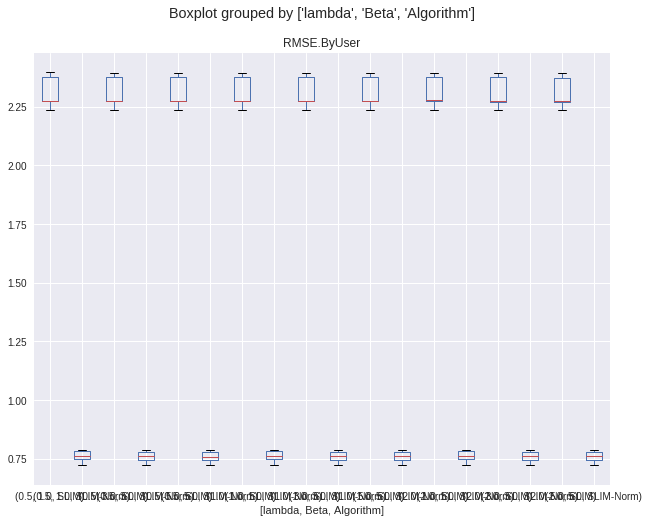

In [25]:
res_slim.boxplot(['RMSE.ByUser'], ['lambda','Beta','Algorithm'], figsize=(10, 8))

## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

In [37]:
df = results.loc[results['lambda'].notnull(),['lambda', 'RMSE.ByUser']].groupby('lambda').mean()
# df.plot.scatter(x=df['lambda'], y=df['RMSE.ByUser'])

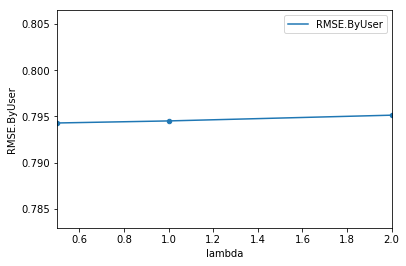

In [45]:
ax = df.reset_index().plot.scatter(y='RMSE.ByUser', x='lambda')
df.plot(ax=ax)

Next up: nDCG

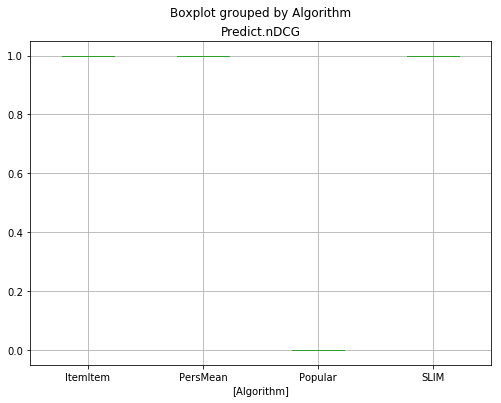

In [7]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01b4078fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f01b3fe8da0>], dtype=object)

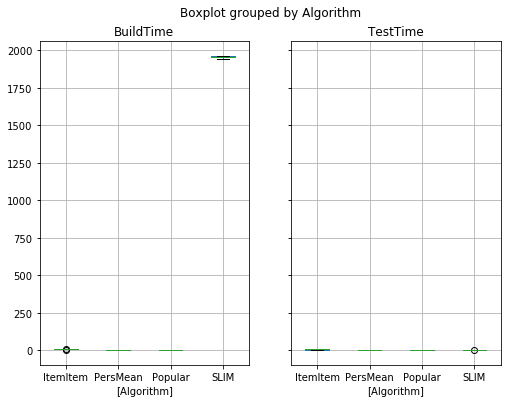

In [8]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

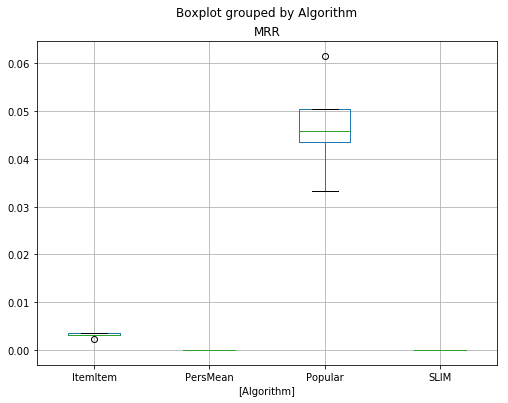

In [9]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

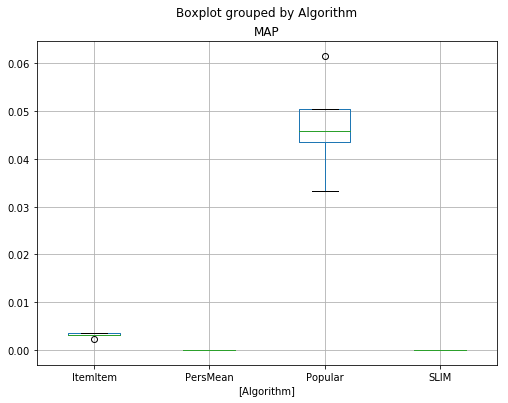

In [10]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

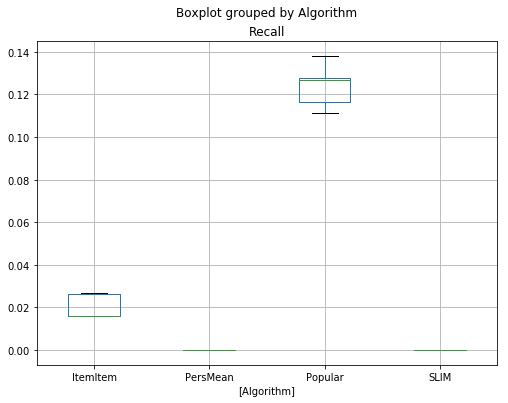

In [11]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

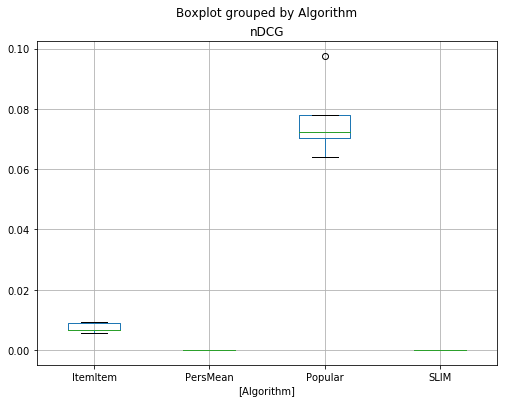

In [12]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))